## Домашнее творческое задание по дисциплине "Технологии обработки больших данных"

Выполнил: студент группы Мамаджанов Азиз

Вариант: __68__

    

In [1]:
import json
import pandas as pd
import numpy as np
import xlwings as xw
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import xlsxwriter
import xlwings as xw


In [2]:
# если в задании 5 получаем нули, то выполнить
# nltk.download('averaged_perceptron_tagger')

______________________

__Задание 1__. В файле `steam_games.json` находится информация об играх из магазина Steam. При помощи пакета `json` считайте файл. Выведите на экран количество игр жанра RPG, самым популярным языком которых является русский. "Язык является самым популярным" означает, что ранг этого языка в списке языков равен 0.

In [3]:
# при помощи пакета json считайте файл

f = open('steam_games.json', encoding='utf8')
data = json.load(f)
f.close()

data

[{'url': 'https://store.steampowered.com/app/959410/The_Endless_Empty/',
  'types': 'app',
  'name': 'The Endless Empty',
  'desc_snippet': 'A surreal post-life adventure',
  'release_date': 'Nov 3, 2018',
  'developer': 'Erik Sheader-Smith',
  'publisher': 'Erik Sheader-Smith,Erik Sheader-Smith',
  'popular_tags': ['Adventure',
   'RPG',
   'Indie',
   'RPGMaker',
   'Story Rich',
   'Surreal'],
  'game_details': ['Single-player',
   'Profile Features Limited\xa0\r\n\t\t\t\t\t\t\t\t\t'],
  'languages': [{'lang': 'English', 'rank': 0}],
  'achievements': 5.0,
  'game_description': " About This Game  All sales of this game will be donated to the Trevor Project. - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - A surreal post-life adventure. It only took a few moments for the feeling of panic to set in. “What if I lived my life wrong? How would I be judged? What if there is nothing after this? The story begins with an individual, recently decease

In [4]:
# выведите на экран количество игр жанра RPG, самым популярным языком которых является русский

rus_games = 0 

for elem in data:
    if 'RPG' in elem['genres']:
        languages = elem['languages'] 
        if languages: 
            main_language = languages[0] 
            if main_language['lang'] == 'Russian': 
                rus_games += 1 

rus_games

69

________________

__Задание 2__. Преобразуйте данные из файла, предложенного в задании 1, в `pd.DataFrame` и свяжите его с переменной `games_df`. Удалите столбцы, содержащие более 65% пропусков. Сгруппируйте таблицу по столбцу `types`. Для каждой группы найдите среднее значение столбца `reviews_cnt`. Добавьте в таблицу столбец `interest`, заполненный по следующему правилу: если значение `reviews_cnt` для строки меньше, чем среднее по соответствующей группе, то в `interest` укажите `low`; иначе `high`.

In [5]:
# преобразуйте данные из файла, предложенного в задании 1, в pd.DataFrame 
# и свяжите его с переменной games_df

games_df = pd.DataFrame(data) 
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,NaN,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,NaN,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows® Vista / 7 / 8,Processor:...","Recommended:,Graphics:,Laptop versions of thes...",$4.99,NaN,very negative,9512,[Simulation],22,90,1088.0
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...",

In [6]:
# удалите столбцы, содержащие более 65% пропусков
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

games_df = games_df.dropna(axis='columns', thresh=int(0.35 * games_df.shape[0] + 1)) 
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,NaN,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,NaN,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows® Vista / 7 / 8,Processor:...","Recommended:,Graphics:,Laptop versions of thes...",$4.99,NaN,very negative,9512,[Simulation],22,90,1088.0
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...",

In [7]:
# сгруппируйте таблицу по столбцу types
# для каждой группы найдите среднее значение столбца reviews_cnt
games_df.groupby('types')['reviews_cnt'].mean()

types
app       10281.925524
bundle    10446.136578
sub       10057.758621
Name: reviews_cnt, dtype: float64

In [8]:
# добавьте в таблицу столбец interest, заполненный по следующему правилу 
# если значение reviews_cnt для строки меньше, чем среднее по соответствующей группе, то в interest - low; иначе high

mean_values = games_df.groupby('types')['reviews_cnt'].mean() 

def interest(row): 
    if row['reviews_cnt'] < mean_values[row['types']]:
        return 'low'
    else:
        return 'high'

games_df['interest'] = games_df.apply(lambda row: interest(row), axis=1) 

games_df 


C:\Users\azmam\AppData\Local\Temp\ipykernel_13972\3519765111.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['interest'] = games_df.apply(lambda row: interest(row), axis=1)


,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,low
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,low
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0,low
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0,high
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0,low
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,Graphics:,Laptop versions of thes...",$4.99,NaN,very negative,9512,[Simulation],22,90,1088.0,low
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0,high
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,NaN,$2.99,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,1257.0,low


______________

__Задание 3__. Выберите из таблицы `games_df` столбцы `avg_rating_users` и `avg_rating_critics`. Преобразуйте полученный набор данных в массив `numpy`. Известно, что существуют такие $i\in I$ и $j \in I$, что $u_i+c_j = 131$. Найдите хотя бы одну пару $(i, j)$, выведите ее на экран, а также выведите на экран элементы, дающие эту сумму. Здесь где $u_i$ - значение столбца `avg_rating_users` для $i$-й строчки; $c_j$ - значение столбца `avg_rating_critics` для $j$-й строчки; $I$ - множество номеров строк.

In [9]:
# выберите из таблицы games_df столбцы avg_rating_users и avg_rating_critics
games_df[['avg_rating_users', 'avg_rating_critics']]

,avg_rating_users,avg_rating_critics
0,77,63
1,94,49
2,58,98
3,51,87
4,80,27
...,...,...
9995,1,50
9996,22,90
9997,7,0
9998,68,22


In [10]:
# преобразуйте полученный набор данных в массив numpy
avg_array = games_df[['avg_rating_users', 'avg_rating_critics']].to_numpy().transpose() 
avg_array

array([[77, 94, 58, ...,  7, 68,  1],
       [63, 49, 98, ...,  0, 22, 32]], dtype=int64)

In [11]:
# найдите хотя бы одну пару  (𝑖,𝑗) , выведите ее на экран
# также выведите на экран элементы, дающие эту сумму

for elem in avg_array[0]: 
    if (131 - elem) in avg_array[1]: 
        print(f'(i, j) = ({list(avg_array[0]).index(elem) + 1}, {list(avg_array[1]).index(131 - elem) + 1}) ----> {elem} + {131 - elem} = 131')


(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (3, 122) ----> 58 + 73 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (17, 29) ----> 46 + 85 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (26, 130) ----> 59 + 72 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (29, 21) ----> 93 + 38 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (35, 58) ----> 47 + 84 = 131
(i, j) = (37

(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (304, 17) ----> 67 + 64 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (26, 130) ----> 59 + 72 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (304, 17) ----> 67 + 64 = 131
(i, j) = (78, 39) ----> 36 + 95 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (281, 37) ----> 91 + 40 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (111, 70) ----> 89 + 42 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (281, 37) ----> 91 + 40 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (304, 17) ----> 67 + 64 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (45, 425) ----> 69 + 62 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (87, 159) ----> 96 + 35 = 131
(i,

(i, j) = (37, 46) ----> 41 + 90 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (62, 12) ----> 90 + 41 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (58, 185) ----> 50 + 81 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (45, 425) ----> 69 + 62 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (304, 17) ----> 67 + 64 = 131
(i, j) = (103, 190) ----> 76 + 55 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (71, 15) ----> 65 + 66 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (26, 130) ----> 59 + 72 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (51, 71) ----> 98 + 33 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i

(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (37, 46) ----> 41 + 90 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (77, 11) ----> 56 + 75 = 131
(i, j) = (77, 11) ----> 56 + 75 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (35, 58) ----> 47 + 84 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (38, 94) ----> 95 + 36 = 131
(i, j) = (64, 135) ----> 62 + 69 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (71, 15) ----> 65 + 66 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (410, 

(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (100, 41) ----> 72 + 59 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (3, 122) ----> 58 + 73 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (64, 135) ----> 62 + 69 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (71, 15) ----> 65 + 66 = 131
(i, j) = (231, 111) ----> 88 + 43 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (111, 70) ----> 89 + 42 = 131


(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (231, 111) ----> 88 + 43 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (78, 39) ----> 36 + 95 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (95, 19) ----> 52 + 79 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (62, 12) ----> 90 + 41 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (43, 102) ----> 57 + 74 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (45, 425) ----> 69 + 62 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = 

(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (100, 41) ----> 72 + 59 = 131
(i, j) = (111, 70) ----> 89 + 42 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (17, 29) ----> 46 + 85 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (181, 6) ----> 39 + 92 = 131
(i, j) = (44, 405) ----> 70 + 61 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (77, 11) ----> 56 + 75 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (51, 71) ----> 98 + 33 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (3, 122) ----> 58 + 73 = 131

(i, j) = (29, 21) ----> 93 + 38 = 131
(i, j) = (37, 46) ----> 41 + 90 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (95, 19) ----> 52 + 79 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (100, 41) ----> 72 + 59 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(

(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (62, 12) ----> 90 + 41 = 131
(i, j) = (239, 53) ----> 49 + 82 = 131
(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (44, 405) ----> 70 + 61 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (62, 12) ----> 90 + 41 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (58, 185) ----> 50 + 81 = 131
(i, j) = (239, 53) ----> 49 + 82 = 131
(i, j) = (231, 111) ----> 88 + 43 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (43, 102) ----> 57 + 74 = 131
(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (35, 58) ----> 47 + 84

(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (29, 21) ----> 93 + 38 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (231, 111) ----> 88 + 43 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (100, 41) ----> 72 + 59 = 131
(i, j) = (38, 94) ----> 95 + 36 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (44, 405) ----> 70 + 61 = 131
(i, j) = (100, 41) ----> 72 + 59 = 131
(i, j) = (304, 17) ----> 67 + 64 = 131
(i, j) = (44, 405) ----> 70 + 61 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (91, 83) ----> 32 + 99 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (38, 94) ----> 95 + 36 = 13

(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (304, 17) ----> 67 + 64 = 131
(i, j) = (95, 19) ----> 52 + 79 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (77, 11) ----> 56 + 75 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (87, 159) ----> 96 + 35 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (29, 21) ----> 93 + 38 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) =

(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (239, 53) ----> 49 + 82 = 131
(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (95, 19) ----> 52 + 79 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (103, 190) ----> 76 + 55 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (37, 46) ----> 41 + 90 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (51, 71) ----> 98 + 33 = 131
(i, j) = (77, 11) ----> 56 + 75 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (64, 135) ----> 62 + 69 = 131
(i, j) = (77, 11) ----> 56 + 75 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i

(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (281, 37) ----> 91 + 40 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (87, 159) ----> 96 + 35 = 131
(i, j) = (91, 83) ----> 32 + 99 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (78, 39) ----> 36 + 95 = 131
(i, j) = (45, 425) ----> 69 + 62 = 131
(i, j) = (17, 29) ----> 46 + 85 = 131
(i, j) = (29, 21) ----> 93 + 38 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (38, 94) ----> 95 + 36 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (17, 29) ----> 46 + 85 = 1

(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (26, 130) ----> 59 + 72 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (91, 83) ----> 32 + 99 = 131
(i, j) = (51, 71) ----> 98 + 33 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (103, 190) ----> 76 + 55 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (44, 405) ----> 70 + 61 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (43, 102) ----> 57 + 74 = 131
(i, j) = (91, 83) ----> 32 + 99 = 131
(i, j) = (239, 53) ----> 49 + 82 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (35, 58) ----> 47 + 84 = 131
(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (751, 218) ----> 92 + 39 = 13

(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (37, 46) ----> 41 + 90 = 131
(i, j) = (87, 159) ----> 96 + 35 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (58, 185) ----> 50 + 81 = 131
(i, j) = (35, 58) ----> 47 + 84 = 131
(i, j) = (26, 130) ----> 59 + 72 = 131
(i, j) = (77, 11) ----> 56 + 75 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (45, 425) ----> 69 + 62 = 

(i, j) = (111, 70) ----> 89 + 42 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (35, 58) ----> 47 + 84 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (111, 70) ----> 89 + 42 = 131
(i, j) = (37, 46) ----> 41 + 90 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (281, 37) ----> 91 + 40 = 131
(i, j) = (51, 71) ----> 98 + 33 = 131
(i, j) = (281, 37) ----> 91 + 40 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (100, 41) ----> 72 + 59 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (175, 13) ----> 63 + 68 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (103, 190) ----> 76 + 55 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (100, 41) ----> 72 + 59 =

(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (91, 83) ----> 32 + 99 = 131
(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (71, 15) ----> 65 + 66 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (39, 69) ----> 99 + 32 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (78, 39) ----> 36 + 95 = 131
(i, j) = (103, 190) ----> 76 + 55 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (35, 58) ----> 47 + 84 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (45, 425) ----> 69 + 62 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (45, 425) ----> 69 + 62 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, 

(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (38, 94) ----> 95 + 36 = 131
(i, j) = (43, 102) ----> 57 + 74 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (45, 425) ----> 69 + 62 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) = (51, 71) ----> 98 + 33 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (100, 41) ----> 72 + 59 = 131
(i, j) = (17, 29) ----> 46 + 85 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (58, 185) ----> 50 + 81 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = 

(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (2, 105) ----> 94 + 37 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (18, 55) ----> 79 + 52 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131
(i, j) = (751, 218) ----> 92 + 39 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (62, 12) ----> 90 + 41 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (37, 46) ----> 41 + 90 = 131
(i, j) = (58, 185) ----> 50 + 81 = 131
(i, j) = (3, 122) ----> 58 + 73 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (38, 94) ----> 95 + 36 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (29, 21) ----> 93 + 38 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) =

(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (64, 135) ----> 62 + 69 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (62, 12) ----> 90 + 41 = 131
(i, j) = (38, 94) ----> 95 + 36 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (91, 83) ----> 32 + 99 = 131
(i, j) = (126, 545) ----> 37 + 94 = 131
(i, j) = (74, 43) ----> 64 + 67 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (49, 1) ----> 68 + 63 = 131
(i, j) = (17, 29) ----> 46 + 85 = 131
(i, j) = (111, 70) ----> 89 + 42 = 131
(i, j) = (14, 283) ----> 38 + 93 = 131
(i, j) = (17, 29) ----> 46 + 85 = 131
(i, j) = (51, 71) ----> 98 + 33 = 131
(i, j

(i, j) = (1, 99) ----> 77 + 54 = 131
(i, j) = (27, 176) ----> 75 + 56 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (71, 15) ----> 65 + 66 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (19, 121) ----> 73 + 58 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (124, 4) ----> 44 + 87 = 131
(i, j) = (59, 216) ----> 83 + 48 = 131
(i, j) = (281, 37) ----> 91 + 40 = 131
(i, j) = (47, 8) ----> 85 + 46 = 131
(i, j) = (21, 151) ----> 84 + 47 = 131
(i, j) = (11, 203) ----> 87 + 44 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (7, 30) ----> 74 + 57 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (54, 10) ----> 35 + 96 = 131
(i, j) = (281, 37) ----> 91 + 40 = 131
(i, j) = (5, 7) ----> 80 + 51 = 131
(i, j) = (30, 79) ----> 42 + 89 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (24, 62) ----> 34 + 97 = 131
(i, j) 

(i, j) = (58, 185) ----> 50 + 81 = 131
(i, j) = (62, 12) ----> 90 + 41 = 131
(i, j) = (13, 76) ----> 40 + 91 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (145, 16) ----> 71 + 60 = 131
(i, j) = (25, 23) ----> 86 + 45 = 131
(i, j) = (9, 25) ----> 66 + 65 = 131
(i, j) = (44, 405) ----> 70 + 61 = 131
(i, j) = (52, 88) ----> 45 + 86 = 131
(i, j) = (64, 135) ----> 62 + 69 = 131
(i, j) = (71, 15) ----> 65 + 66 = 131
(i, j) = (115, 97) ----> 48 + 83 = 131
(i, j) = (135, 56) ----> 97 + 34 = 131
(i, j) = (239, 53) ----> 49 + 82 = 131
(i, j) = (84, 3) ----> 33 + 98 = 131
(i, j) = (152, 74) ----> 43 + 88 = 131
(i, j) = (31, 148) ----> 81 + 50 = 131
(i, j) = (58, 185) ----> 50 + 81 = 131
(i, j) = (4, 18) ----> 51 + 80 = 131
(i, j) = (73, 38) ----> 55 + 76 = 131
(i, j) = (410, 476) ----> 78 + 53 = 131
(i, j) = (86, 84) ----> 60 + 71 = 131
(i, j) = (10, 22) ----> 61 + 70 = 131
(i, j) = (104, 48) ----> 53 + 78 = 131
(i, j) = (48, 2) ----> 82 + 49 = 131
(i, j) = (119, 144) ----> 54 + 77 = 131


________________

__Задание 4__. Преобразуйте столбец `original_price` в числовой. Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца. Проведите [min-max нормализацию](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization) столбцов `original_price` и `selled`. Постройте диаграмму рассеяния на основе двух этих столбцов. Сделайте цвет точек черным, размер точек - 5. Добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите прямую линию от точки (0, 1) до (1, 0). Сделайте эту линию красной и пунктирной.

In [12]:
# преобразуйте столбец original_price в числовой
games_df['original_price'] = games_df['original_price'].str.replace('$', '').apply(float)
games_df.dtypes

C:\Users\azmam\AppData\Local\Temp\ipykernel_13972\1452358012.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  games_df['original_price'] = games_df['original_price'].str.replace('$', '').apply(float)
C:\Users\azmam\AppData\Local\Temp\ipykernel_13972\1452358012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['original_price'] = games_df['original_price'].str.replace('$', '').apply(float)


url                          object
types                        object
name                         object
desc_snippet                 object
release_date                 object
developer                    object
publisher                    object
popular_tags                 object
game_details                 object
languages                    object
game_description             object
minimum_requirements         object
recommended_requirements     object
original_price              float64
discount_price               object
reviews_mood                 object
reviews_cnt                   int64
genres                       object
avg_rating_users              int64
avg_rating_critics            int64
selled                      float64
interest                     object
dtype: object

In [13]:
# удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца
third_quartile = games_df.original_price.quantile(0.75) 
games_df = games_df[games_df['original_price'] <= third_quartile] 
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,low
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0,high
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,NaN,1.99,$5.21,positive,11983,"[Indie, RPG]",29,46,1380.0,high
10,https://store.steampowered.com/app/668710/Stea...,app,Steam Starter Pack,NaN,"Jul 13, 2017",Disruptor Beam Inc.,"Disruptor Beam Inc.,Disruptor Beam Inc.","[Adventure, RPG, Strategy, Free to Play]","[Online Multi-Player, Downloadable Content, St...","[{'lang': 'Spanish - Spain', 'rank': 0}, {'lan...",...,NaN,9.99,NaN,negative,3615,"[Adventure, Free to Play, RPG, Strategy]",87,75,587.0,low
11,https://store.steampowered.com/app/810880/Grea...,app,Great Adventures in New Worlds Vol. 1,NaN,"Apr 17, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[RPG],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'Traditional Chinese', 'rank': 0}, {...",...,"Recommended:,OS:,Windows® 7, Windows® 8.1, Win...",11.99,NaN,positive,14172,[RPG],6,41,377.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,https://store.steampowered.com/app/634012/Awes...,app,Awesomenauts - Commander Cook-It Skin,NaN,"Aug 16, 2017",Ronimo Games,NaN,"[Strategy, Action, Indie, Free to Play]","[Single-player, Multi-player, Co-op, Shared/Sp...","[{'lang': 'German', 'rank': 0}, {'lang': 'Dutc...",...,"Recommended:,OS:,Windows 7, Windows 8, or Wind...",4.99,$1.99,very positive,8429,"[Action, Free to Play, Indie, Strategy]",51,37,1091.0,low
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,Graphics:,Laptop versions of thes...",4.99,NaN,very negative,9512,[Simulation],22,90,1088.0,low
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Recommended:,Requires a 64-bit processor and o...",0.99,$14.72,very positive,16437,[Action],7,0,1454.0,high
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,NaN,2.99,$150.02,very negative,1577,"[Adventur

In [14]:
# проведите min-max нормализацию столбцов original_price и selled
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

scaler = MinMaxScaler()

scaler.fit(games_df[['selled']])
games_df['selled'] = scaler.transform(games_df[['selled']]) # нормализуем столбец selled

scaler.fit(games_df[['original_price']])
games_df['original_price'] = scaler.transform(games_df[['original_price']]) # нормализуем столбец original_price

games_df[['original_price', 'selled']]


C:\Users\azmam\AppData\Local\Temp\ipykernel_13972\1579038671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['selled'] = scaler.transform(games_df[['selled']]) # нормализуем столбец selled
C:\Users\azmam\AppData\Local\Temp\ipykernel_13972\1579038671.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['original_price'] = scaler.transform(games_df[['original_price']]) # нормализуем столбец original_price


,original_price,selled
0,0.301784,0.730229
3,0.767261,0.264597
7,0.146625,0.871397
10,0.767261,0.285292
11,0.922420,0.130081
...,...,...
9992,0.379364,0.657797
9996,0.379364,0.655580
9997,0.069046,0.926090
9998,0.224205,0.780488


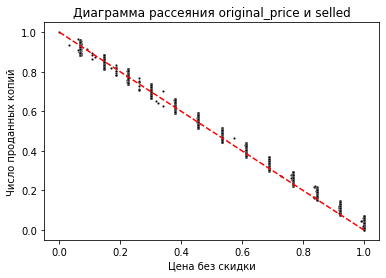

In [15]:
# Постройте диаграмму рассеяния на основе двух этих столбцов. 
# Сделайте цвет точек черным, размер точек - 5. 
# Добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. 
# Проведите прямую линию от точки (0, 1) до (1, 0). Сделайте эту линию красной и пунктирной.

sns.scatterplot(data=games_df, x = 'original_price', y='selled', s=5, color='black') 
plt.xlabel('Цена без скидки') 
plt.ylabel('Число проданных копий')
plt.title('Диаграмма рассеяния original_price и selled')

plt.plot([0, 1], [1, 0], 'r', linestyle="--") # строим пунктирную линию красного цвета из (0,1) в (1,0)

______________________

__Задание 5__. Для каждого сниппета описания из столбца `desc_snippet` таблицы `games_df` выясните, какие в нем содержатся части речи. Добавьте к фрейму столбец `n_pos`, в котором указано количество различных частей речи, присутствующих в сниппете. 

In [16]:
# Для каждого сниппета описания из столбца desc_snippet таблицы games_df выясните, какие в нем содержатся части речи

def part_of_speech_counter(text): 
    try: 
        text = nltk.word_tokenize(text) # разбиваем предложение на слова
        tagged = nltk.pos_tag(text) # узнаем какие части речи в предложении
        return len(Counter(tag for word, tag in tagged)) # возвращаем число различных частей речи
    except:
        return 0

# Добавьте к фрейму столбец n_pos, в котором указано количество различных частей речи, присутствующих в сниппете.
games_df['n_pos'] = games_df['desc_snippet'].apply(part_of_speech_counter) 
games_df


C:\Users\azmam\AppData\Local\Temp\ipykernel_13972\2073689830.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['n_pos'] = games_df['desc_snippet'].apply(part_of_speech_counter)


,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest,n_pos
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,0.301784,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,0.730229,low,3
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,0.767261,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,0.264597,high,0
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,0.146625,$5.21,positive,11983,"[Indie, RPG]",29,46,0.871397,high,13
10,https://store.steampowered.com/app/668710/Stea...,app,Steam Starter Pack,NaN,"Jul 13, 2017",Disruptor Beam Inc.,"Disruptor Beam Inc.,Disruptor Beam Inc.","[Adventure, RPG, Strategy, Free to Play]","[Online Multi-Player, Downloadable Content, St...","[{'lang': 'Spanish - Spain', 'rank': 0}, {'lan...",...,0.767261,NaN,negative,3615,"[Adventure, Free to Play, RPG, Strategy]",87,75,0.285292,low,0
11,https://store.steampowered.com/app/810880/Grea...,app,Great Adventures in New Worlds Vol. 1,NaN,"Apr 17, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[RPG],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'Traditional Chinese', 'rank': 0}, {...",...,0.922420,NaN,positive,14172,[RPG],6,41,0.130081,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,https://store.steampowered.com/app/634012/Awes...,app,Awesomenauts - Commander Cook-It Skin,NaN,"Aug 16, 2017",Ronimo Games,NaN,"[Strategy, Action, Indie, Free to Play]","[Single-player, Multi-player, Co-op, Shared/Sp...","[{'lang': 'German', 'rank': 0}, {'lang': 'Dutc...",...,0.379364,$1.99,very positive,8429,"[Action, Free to Play, Indie, Strategy]",51,37,0.657797,low,0
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,0.379364,NaN,very negative,9512,[Simulation],22,90,0.655580,low,0
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,0.069046,$14.72,very positive,16437,[Action],7,0,0.926090,high,0
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,0.224205,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,0.780488,low,19


__________________

__Задание 6__. Сохрание текущее состояние `games_df` в рабочую книгу "games.xlsx". Для каждого текстового столбца при помощи протягиваемых функций Excel найдите количество непустых ячеек в столбце. Поместите результаты вычислений после таблицы с данными. Добавьте в строку с количеством непустых ячеек цветовую шкалу от серого (ближе к минимуму) до желтого (ближе к максимуму). Создайте лист "Визуализация" и разместите на нем рисунок из задания 4, начиная с ячейки "D5". Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

* Примечание: для выявления типа столбца в Excel вы можете воспользоваться функций ЕТЕКСТ и проверить первый элемент в соответствующем столбце.

In [17]:
# https://xlsxwriter.readthedocs.io/working_with_cell_notation.html
# https://xlsxwriter.readthedocs.io/working_with_conditional_formats.html

# сохрание текущее состояние games_df в рабочую книгу "games.xlsx".
games_df_xlsx = pd.ExcelWriter('games.xlsx', engine='xlsxwriter') 
games_df.to_excel(games_df_xlsx, index=False, header=True, sheet_name='Таблица games_df') # записываем таблицу games_df в games_df_xlsx

last_col = xlsxwriter.utility.xl_col_to_name(len(games_df.columns) - 1)
last_row = len(games_df) + 1

# Добавьте в строку с количеством непустых ячеек цветовую шкалу от серого (ближе к минимуму) до желтого (ближе к максимуму)
worksheet = games_df_xlsx.sheets['Таблица games_df'] # добавляем цветовую шкалу
worksheet.conditional_format(f"A{last_row + 1}:{last_col}{last_row + 1}", {'type': '2_color_scale',
                                    'criteria': '<',
                                    'value': 0,
                                    'min_color': "gray",
                                    'max_color': "yellow"})

games_df_xlsx.save()

In [18]:
# добавляем протягиваемые формулы

workbook = xw.Book("games.xlsx")
worksheet = workbook.sheets["Таблица games_df"]

# Для каждого текстового столбца при помощи протягиваемых функций Excel найдите количество непустых ячеек в столбце.
# Поместите результаты вычислений после таблицы с данными.
# https://support.microsoft.com/ru-ru/office/%D0%B5-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8-%D0%B5-0f2d7971-6019-40a0-a171-f2d869135665
worksheet.range(f"A{last_row + 1}:{last_col}{last_row + 1}").formula=f'=IF(ISTEXT(A2), COUNTA(A2:A{last_row})," ")'

# Создайте лист "Визуализация" и разместите на нем рисунок из задания 4, начиная с ячейки
workbook.sheets.add(name='Визуализация') # добавляем лист "визуализация"
worksheet = workbook.sheets["Визуализация"]


fig = plt.figure()
sns.scatterplot(data=games_df, x='original_price', y='selled', s=5, color='black') 
plt.xlabel('Цена без скидки') 
plt.ylabel('Число проданных копий')
plt.title('Диаграмма рассеяния original_price и selled')
plt.plot([0, 1], [1, 0], 'r', linestyle="--") 

# добавляем график на лист
worksheet.pictures.add(fig, name='Рисунок из задания 4', left=worksheet.range('D5').left, top=worksheet.range('D5').top)

<Picture 'Рисунок из задания 4' in <Sheet [games.xlsx]Визуализация>>